## Introduction To Elbow Method 
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of clusters.  In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering 

## What Is the Elbow Method in K-Means Clustering
As we know in the k-means clustering algorithm we randomly initialize k clusters and we iteratively adjust these k clusters till these k-centroids riches in an equilibrium state. However, the main thing we do before initializing these clusters is that determine how many clusters we have to use. 

For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value.

WCSS - It is defined as the sum of square distances between the centroids and
each points.

Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. Surprisingly the graph looks like an elbow (which we will see later). Also, When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease. We choose that value of k from where the graph starts to look like a straight line.



### Implementation of the Elbow Method Usking Sklearn in Python
We will see how to implement the elbow method in 4 steps. At first, we will create random dataset points, then we will apply k-means on this dataset and calculate wcss value for k between 1 to 4.

##### Step 1: Importing the required libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


### Step 2: Creating and Visualizing the data

We will create a random array and visualize its distribution

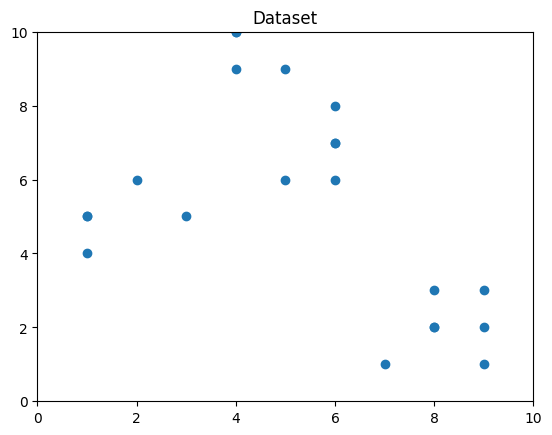

In [2]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,\
			7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, \
			1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


From the above visualization, we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.

##### We now define the following:-

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters to each data point. Typically, the Euclidean distance metric is used.

                Distortion = 1/n * Σ(distance(point, centroid)^2)
Inertia: It is the sum of the squared distances of samples to their closest cluster center.

                 Inertia = Σ(distance(point, centroid)^2)

We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

### Step 3: Building the clustering model and calculating the values of the Distortion and Inertia:

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


### Step 4: Tabulating and Visualizing the Results
a) Using the different values of Distortion:

In [4]:
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 3.625551331197001
2 : 2.0318238533112596
3 : 1.2423303391744152
4 : 0.8367738708386461
5 : 0.738562112077144
6 : 0.7088328878199923
7 : 0.6148547710801512
8 : 0.5472971175349353
9 : 0.48240453183331927


Next we will plot the graph of k versus WCSS  

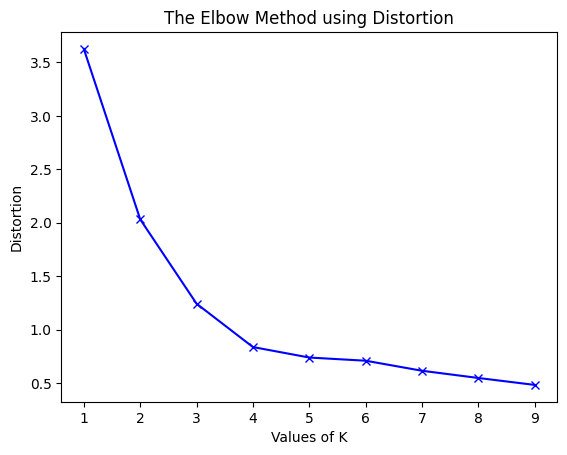

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


b) Using the different values of Inertia:

In [6]:
for key, val in mapping2.items():
	print(f'{key} : {val}')


1 : 312.95238095238096
2 : 108.07142857142856
3 : 39.51746031746031
4 : 17.978571428571428
5 : 15.528571428571428
6 : 12.616666666666665
7 : 9.683333333333334
8 : 10.261904761904763
9 : 7.0


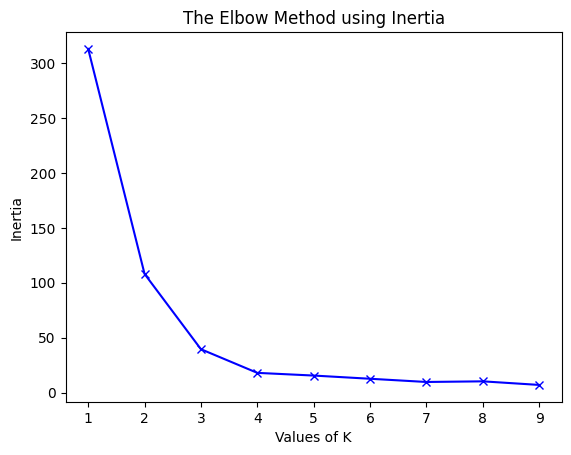

In [7]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

### Clustered Data Points For Different k Values
We will plot images of data points clustered for different values of k. For this, we will apply the k-means algorithm on the dataset by iterating on a range of k values.

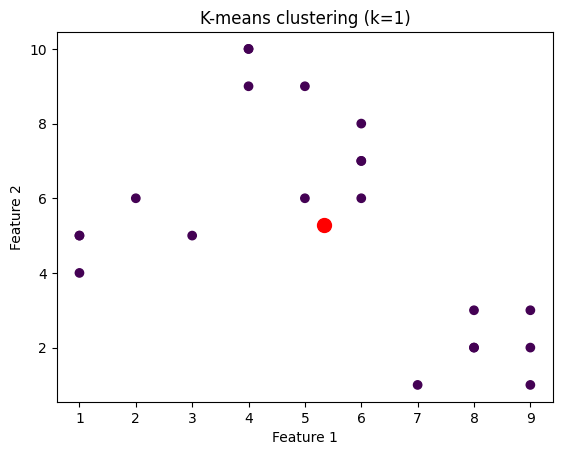

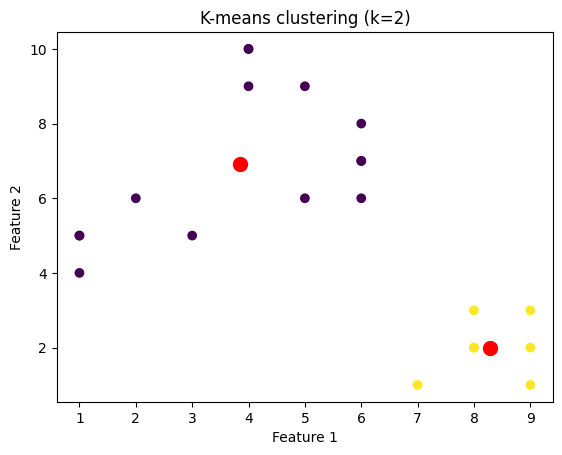

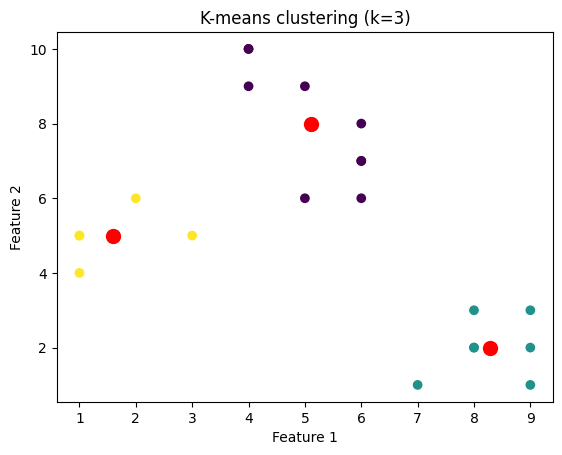

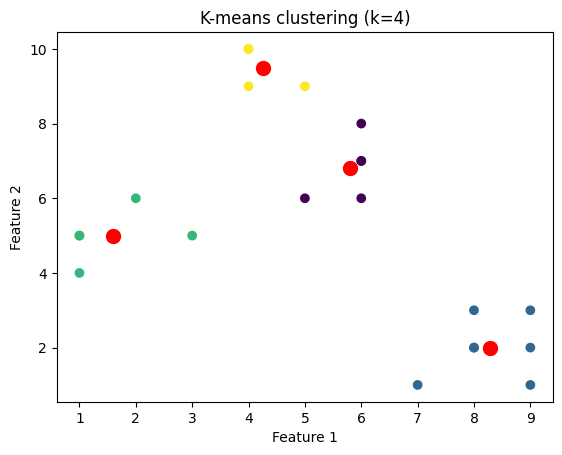

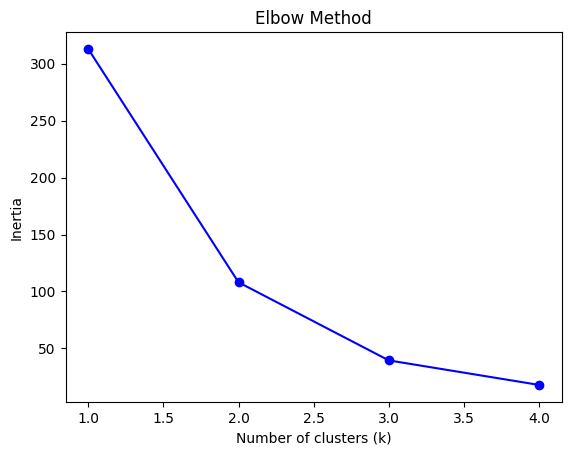

In [8]:
import matplotlib.pyplot as plt

# Create a range of values for k
k_range = range(1, 5)

# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
	kmeans = KMeans(n_clusters=k, \
					init='k-means++', random_state=42)
	y_kmeans = kmeans.fit_predict(X)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],\
				kmeans.cluster_centers_[:, 1], \
				s=100, c='red')
	plt.title('K-means clustering (k={})'.format(k))
	plt.xlabel('Feature 1')
	plt.ylabel('Feature 2')
	plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()
